<div align="center">
    <h3> LOGISTIC REGRESSION </h3>
</div>

### Importing Libraries

In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, roc_curve,ConfusionMatrixDisplay
import matplotlib.pyplot  as plt


### Loading and Preprocessing dataset

In [12]:
data = pd.read_csv("C:/Users/Pranjal Oza/Elevate_Lab/healthcare-dataset-stroke-data.csv")

In [13]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
data.drop('id', axis=1, inplace = True) #Dropping id column

In [76]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median()) # Handling missing valuesin 'bmi' by imputing mean

In [77]:
data['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [79]:
data = pd.get_dummies(data, drop_first = True) # Encode categorical features

In [80]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,False,False,True,False,True,False,False,True,False,True,False
5106,81.0,0,0,125.20,40.000000,0,False,False,True,False,False,True,False,True,False,True,False
5107,35.0,0,0,82.99,30.600000,0,False,False,True,False,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.600000,0,True,False,True,False,True,False,False,False,True,False,False


In [81]:
x = data.drop('stroke', axis = 1)
y = data['stroke']

In [82]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, random_state =42) # splitting data into train-test sets

In [83]:
#Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

### Fit logistic regresssion model 

In [85]:
model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

### Evaluation of metrics

Confusion Matrix:



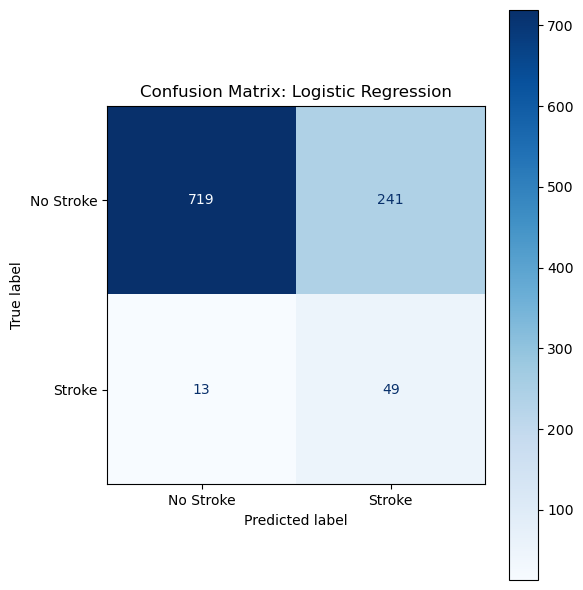


 Classification report :
               precision    recall  f1-score   support

           0     0.9822    0.7490    0.8499       960
           1     0.1690    0.7903    0.2784        62

    accuracy                         0.7515      1022
   macro avg     0.5756    0.7696    0.5641      1022
weighted avg     0.9329    0.7515    0.8152      1022


ROC-AUC Score: 0.8526


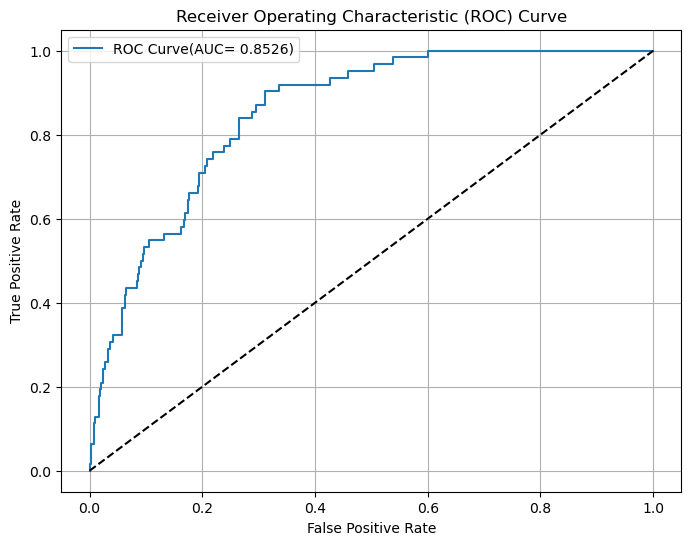

In [103]:
y_pred_prob = model.predict_proba(x_test_scaled)[:,1] # Predict probabilities
y_pred = (y_pred_prob >= 0.5).astype(int) #Predict classes with default threshold of 0.5


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues", values_format='d')
plt.title("Confusion Matrix: Logistic Regression")
plt.tight_layout()
plt.show()

#Classification report
print("\n Classification report :\n", classification_report(y_test, y_pred,zero_division=0,digits=4))

#ROC - AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

#Plotting ROC  curve
fpr, tpr,thresholds = roc_curve (y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, label=f'ROC Curve(AUC= {roc_auc:.4f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

### Tuning Threshold


 Adjusted confusion matrix  with threshold {threshold}:
 [[642 318]
 [  6  56]]


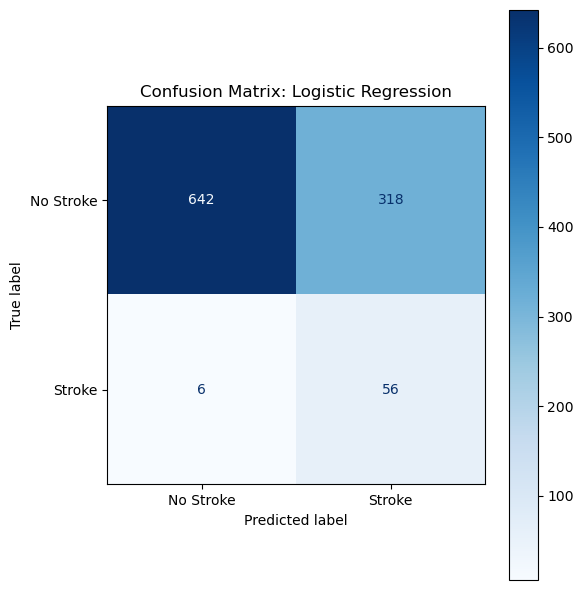


Classification Report with Threshold 0.4:
               precision    recall  f1-score   support

           0       0.99      0.67      0.80       960
           1       0.15      0.90      0.26        62

    accuracy                           0.68      1022
   macro avg       0.57      0.79      0.53      1022
weighted avg       0.94      0.68      0.77      1022



In [104]:
threshold = 0.4
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

#Confusion matrix
print("\n Adjusted confusion matrix  with threshold {threshold}:\n",cm_adj)
cm = confusion_matrix(y_test, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Stroke", "Stroke"])

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues", values_format='d')
plt.title("Confusion Matrix: Logistic Regression")
plt.tight_layout()
plt.show()

# Classification report with adjusted threshold
print(f"\nClassification Report with Threshold {threshold}:\n", classification_report(y_test, y_pred_adjusted,zero_division=0))

This is the confusion matrix for our best-performing model, Logistic Regression:
- True Positives (56): Stroke cases correctly identified.
- False Negatives (6): Stroke cases that were missed — critical in a clinical setting.
- False Positives (318): Non-stroke cases predicted as stroke — may lead to unnecessary follow-up, but acceptable in medical screening.
- True Negatives (642): Non-stroke cases correctly classified.

### Sigmoid Function

The logistic regression model uses the sigmoid function to map predicted values to probabilities between 0 and 1. The sigmoid function is defined as:
σ(z) = 1 / (1 + e^(-z))
Where:
- z is the linear combination of input features and their corresponding coefficients.
- σ(z) represents the probability that the given input belongs to the positive class.
By adjusting the threshold applied to σ(z), we can control the sensitivity of the classifier to positive predictions.

<div align='center'>
    <h3> THANK YOU😊 </h3>
</div>